In [1]:
# data analysis and wrangling

import pandas as pd
import numpy as np


# visualization
import matplotlib.pyplot as plt
import seaborn as sn

import warnings 
warnings.filterwarnings('ignore')

# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv('temperature forecast')
df.head()


,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [3]:
df.shape

(7752, 25)

In [4]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [ ]:
# there are null datas present in data

In [5]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [6]:
# date to be converted into seperate day,month and year

In [7]:
df['Date1']=df['Date'].str.split('-').str[0]

In [8]:
df['Month']=df['Date'].str.split('-').str[1]

In [9]:
df['Year']=df['Date'].str.split('-').str[2]

In [10]:
# will be dropping now date column

In [11]:
df.drop('Date',axis=1,inplace=True)

In [12]:
# to correct nan,infinity values

#df1=df[~df.isin([np.nan,np.inf,-np.inf]).any(1)]

In [13]:
cor=df.corr()

In [14]:
cor

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.113211,0.132419,-0.067122,-0.168010,0.069561,0.105422,0.005320,-0.134226,0.006956,...,-0.008369,-0.012671,-0.010580,-0.237610,-0.118763,-0.255970,-0.090113,-0.019011,0.108306,0.128719
Present_Tmax,0.113211,1.000000,0.618760,-0.206782,-0.304209,0.575289,0.629247,-0.122876,0.136716,-0.314863,...,-0.100420,-0.121271,-0.101471,-0.052776,0.009075,-0.187855,-0.106097,-0.025557,0.613109,0.625252
Present_Tmin,0.132419,0.618760,1.000000,0.124921,-0.015334,0.470118,0.772921,-0.035111,-0.009368,0.085593,...,0.069095,-0.046645,-0.064394,-0.078715,-0.043725,-0.251257,-0.146736,0.053828,0.473868,0.799758
LDAPS_RHmin,-0.067122,-0.206782,0.124921,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,0.613818,...,0.390967,0.240642,0.168595,0.087523,-0.076608,0.102612,0.124346,0.244795,-0.442958,0.095830
LDAPS_RHmax,-0.168010,-0.304209,-0.015334,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,0.436652,...,0.229050,0.134607,0.117853,0.196751,0.025792,0.178031,0.220668,0.149699,-0.286478,-0.072490
LDAPS_Tmax_lapse,0.069561,0.575289,0.470118,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,-0.438439,...,-0.242122,-0.188115,-0.160273,-0.042298,0.091107,-0.179766,-0.163123,0.048111,0.836144,0.591535
LDAPS_Tmin_lapse,0.105422,0.629247,0.772921,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,0.010901,...,0.000870,-0.088575,-0.094655,-0.096726,-0.026831,-0.196407,-0.186753,0.160443,0.593195,0.886964
LDAPS_WS,0.005320,-0.122876,-0.035111,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,0.289445,...,0.191886,0.161684,0.144085,0.036836,-0.059756,0.191983,0.172464,0.122116,-0.346592,-0.097390
LDAPS_LH,-0.134226,0.136716,-0.009368,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,-0.147296,...,-0.077545,0.016102,0.019979,0.133870,0.025948,0.055402,0.087203,-0.047523,0.159324,-0.055895
LDAPS_CC1,0.006956,-0.314863,0.085593,0.613818,0.436652,-0.438439,0.010901,0.289445,-0.147296,1.000000,...,0.389453,0.168742,0.091722,-0.008170,-0.006876,-0.014159,-0.020853,0.218949,-0.457583,-0.011129


<AxesSubplot:>

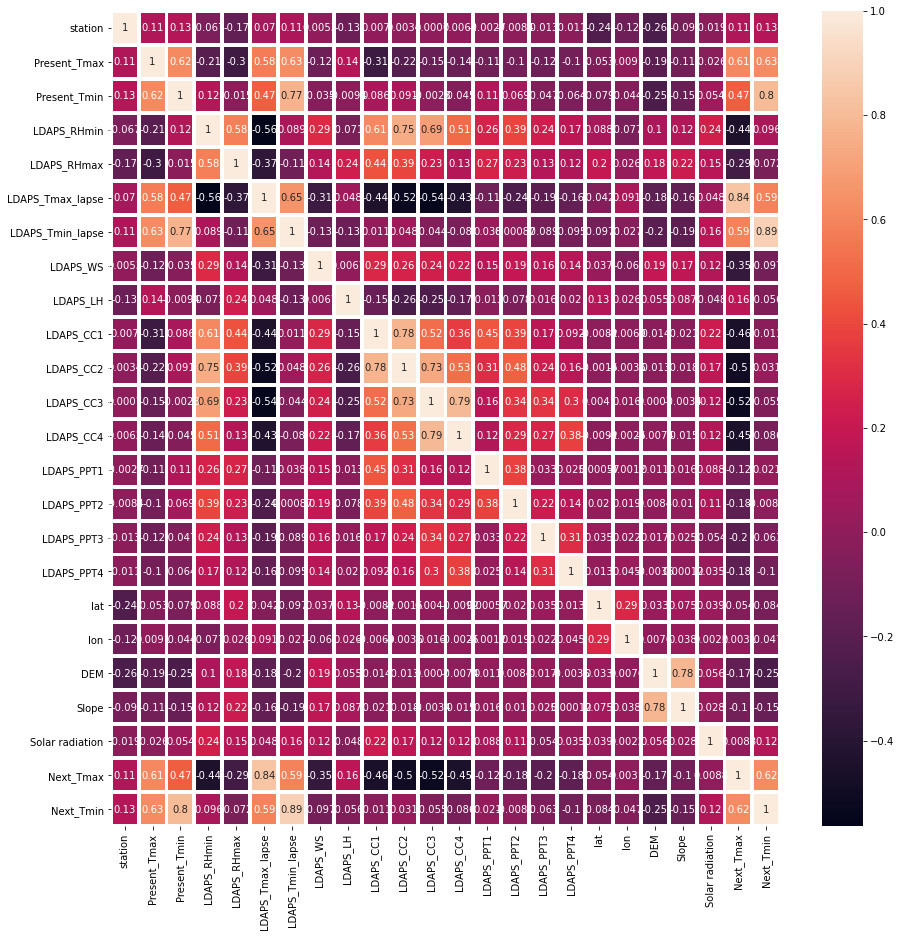

In [15]:
plt.figure(figsize=(15,15))
sn.heatmap(cor,annot=True,linewidth=3,linecolor='white')

In [74]:
# max & min temp is more correlated with present max,present min temp,LDAPS Tmax lapse and LDAPS Tmin

station                AxesSubplot(0.125,0.749828;0.0824468x0.130172)
Present_Tmax        AxesSubplot(0.223936,0.749828;0.0824468x0.130172)
Present_Tmin        AxesSubplot(0.322872,0.749828;0.0824468x0.130172)
LDAPS_RHmin         AxesSubplot(0.421809,0.749828;0.0824468x0.130172)
LDAPS_RHmax         AxesSubplot(0.520745,0.749828;0.0824468x0.130172)
LDAPS_Tmax_lapse    AxesSubplot(0.619681,0.749828;0.0824468x0.130172)
LDAPS_Tmin_lapse    AxesSubplot(0.718617,0.749828;0.0824468x0.130172)
LDAPS_WS            AxesSubplot(0.817553,0.749828;0.0824468x0.130172)
LDAPS_LH               AxesSubplot(0.125,0.593621;0.0824468x0.130172)
LDAPS_CC1           AxesSubplot(0.223936,0.593621;0.0824468x0.130172)
LDAPS_CC2           AxesSubplot(0.322872,0.593621;0.0824468x0.130172)
LDAPS_CC3           AxesSubplot(0.421809,0.593621;0.0824468x0.130172)
LDAPS_CC4           AxesSubplot(0.520745,0.593621;0.0824468x0.130172)
LDAPS_PPT1          AxesSubplot(0.619681,0.593621;0.0824468x0.130172)
LDAPS_PPT2          

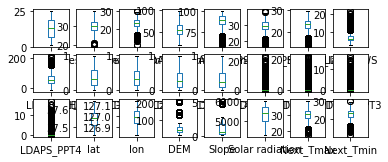

In [16]:
df.plot(kind='box',subplots=True,layout=(5,8))

In [75]:
# have plotted all boxplots at one shot,many outliers are present in dataset

In [17]:
collist=df.columns.values
ncol=15
nrows=10

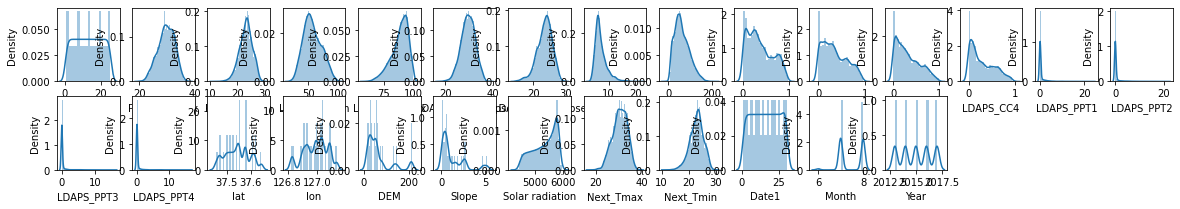

In [18]:
# plotting dist plot to check data distribution 
# snapshot of distribution curves of all input datas

plt.figure(figsize=(20,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sn.distplot(df[collist[i]])

In [ ]:
# from above pic datas are skewed 

In [19]:
df.shape

(7752, 27)

In [20]:
df.skew()

station             0.000000
Present_Tmax       -0.262942
Present_Tmin       -0.365875
LDAPS_RHmin         0.298765
LDAPS_RHmax        -0.850870
LDAPS_Tmax_lapse   -0.226775
LDAPS_Tmin_lapse   -0.578943
LDAPS_WS            1.571581
LDAPS_LH            0.670491
LDAPS_CC1           0.457231
LDAPS_CC2           0.470060
LDAPS_CC3           0.637630
LDAPS_CC4           0.663251
LDAPS_PPT1          5.367675
LDAPS_PPT2          5.747360
LDAPS_PPT3          6.425829
LDAPS_PPT4          6.792379
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.339607
Next_Tmin          -0.403743
Date1              -0.008925
Month              -0.195864
Year                0.000000
dtype: float64

In [25]:
# dropping following columns since it won't affect prediction

df.drop('Date1',axis=1,inplace=True)
df.drop('Month',axis=1,inplace=True)
df.drop('Year',axis=1,inplace=True)
df.drop('LDAPS_PPT1',axis=1,inplace=True)
df.drop('LDAPS_PPT2',axis=1,inplace=True)
df.drop('LDAPS_PPT3',axis=1,inplace=True)
df.drop('LDAPS_PPT4',axis=1,inplace=True)

In [26]:
# to treat all null values applying following 

df=df[~df.isin([np.nan,np.inf,-np.inf]).any(1)]

In [27]:
# to remove outliers from dataset

from scipy.stats import zscore
z=np.abs(zscore(df))
new_df=df[(z<3).all(axis=1)]

In [ ]:
# data loss is only 3.62%

In [28]:
df.shape,new_df.shape

((7588, 20), (7313, 20))

In [29]:
# Model building and training

x=new_df.drop('Next_Tmax',axis=1)




In [30]:
x1=x.drop('Next_Tmin',axis=1)

In [31]:
x1

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,lat,lon,DEM,Slope,Solar radiation
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,1.616969e-01,0.130928,37.6046,126.991,212.3350,2.7850,5992.895996
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,1.594441e-01,0.127727,37.6046,127.032,44.7624,0.5141,5869.312500
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,2.040915e-01,0.142125,37.5776,127.058,33.3068,0.2661,5863.555664
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,1.611574e-01,0.134249,37.6450,127.022,45.7160,2.5348,5856.964844
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,1.788925e-01,0.170021,37.5507,127.135,35.0380,0.5055,5859.552246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,0.000000e+00,0.004380,37.5507,127.040,26.2980,0.5721,4456.024414
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,0.017678,37.5102,127.086,21.9668,0.1332,4441.803711
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,0.000000,37.5372,126.891,15.5876,0.1554,4443.313965
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,0.000000,37.5237,126.909,17.2956,0.2223,4438.373535


In [32]:
x1.shape

(7313, 18)

In [33]:
y=new_df['Next_Tmax']

In [34]:
y

0       29.1
1       30.5
2       31.1
3       31.7
4       31.2
        ... 
7745    27.6
7746    28.0
7747    28.3
7748    28.6
7749    27.8
Name: Next_Tmax, Length: 7313, dtype: float64

In [35]:
y1=new_df['Next_Tmin']

In [36]:
y1

0       21.2
1       22.5
2       23.9
3       24.3
4       22.5
        ... 
7745    17.7
7746    17.1
7747    18.1
7748    18.8
7749    17.4
Name: Next_Tmin, Length: 7313, dtype: float64

In [37]:
Y=pd.concat([y,y1],axis=1)



In [38]:
Y

,Next_Tmax,Next_Tmin
0,29.1,21.2
1,30.5,22.5
2,31.1,23.9
3,31.7,24.3
4,31.2,22.5
...,...,...
7745,27.6,17.7
7746,28.0,17.1
7747,28.3,18.1
7748,28.6,18.8


In [39]:
# method 1- for multouput regerssion applied following

In [77]:
#Linear regression for multioutput regression
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
# create datasets
x1,Y = make_regression(n_samples=7313, n_features=18, n_informative=5, n_targets=2, random_state=10, noise=3)
# define model
model = LinearRegression()
# fit model
model.fit(x1, Y)
# make a prediction
pred=model.predict(x1)
print(pred)

[[ 18.03059746 -87.68320744]
 [161.01646456  67.57302604]
 [156.42883802  22.98707816]
 ...
 [159.08355821 128.12196221]
 [-55.08985683  10.32901289]
 [ 89.06934272 142.36476844]]


In [42]:
# k-nearest neighbors for multioutput regression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
# create datasets
x1,Y = make_regression(n_samples=7313, n_features=18, n_informative=5, n_targets=2, random_state=10, noise=3)
# define model
model = KNeighborsRegressor()
# fit model
model.fit(x1,Y)
# make a prediction
pred=model.predict(x1)
print(pred)

[[ 11.72742817 -23.81380858]
 [ 41.37458014   1.68262127]
 [121.17486989   5.52601861]
 ...
 [ 95.83358109  78.43506261]
 [-83.12686499 -12.12435958]
 [ 92.84707397 145.69003721]]


In [43]:
# decision tree for multioutput regression
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
# create datasets
x1,Y= make_regression(n_samples=7313, n_features=18, n_informative=5, n_targets=2, random_state=10, noise=3)
# define model
model = DecisionTreeRegressor()
# fit model
model.fit(x1,Y)
# make a prediction
pred=model.predict(x1)
print(pred)

[[ 18.15218293 -87.91736156]
 [156.4234284   62.28896362]
 [154.18332443  19.34293838]
 ...
 [159.98151191 127.50472596]
 [-61.55052805  11.4213545 ]
 [ 93.81119845 143.86685743]]


In [44]:
# evaluate multioutput regression model with k-fold cross-validation
from numpy import absolute
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
# create datasets
x1,Y = make_regression(n_samples=7313, n_features=18, n_informative=5, n_targets=2, random_state=10, noise=3)
# define model
model = DecisionTreeRegressor()
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, x1, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 39.996 (1.020)


In [45]:
# Method 2- 

In [46]:
x1_train,x1_test,Y_train,Y_test=train_test_split(x1,Y,test_size=0.30,random_state=30)

In [47]:
lm=LinearRegression()

In [48]:
lm.fit(x1_train,Y_train)
LinearRegression()

LinearRegression()

In [49]:
lm.coef_

array([[ 6.02595232e+01,  1.08380816e-02,  5.82851575e+01,
        -5.92471574e-02, -6.38405622e-03, -4.01967316e-02,
        -1.24511151e-02, -3.16021801e-02, -1.00852553e-01,
        -8.94983558e-02, -2.86706079e-02,  7.82310409e+00,
         6.28765746e+01,  8.63594203e+01, -1.31242410e-02,
        -1.40556510e-02,  3.49584297e-02, -1.18062713e-02],
       [ 3.95705870e+01,  7.97285519e-03,  3.10946828e+01,
        -8.19025863e-02,  1.62939169e-02, -5.79010026e-02,
         8.79853408e-02, -3.61659969e-03, -5.63302519e-02,
        -2.24870545e-02, -6.40007328e-02,  7.64762681e+01,
         2.53016462e+00,  3.83467495e+01,  8.17721259e-03,
        -3.91128526e-02,  6.22181668e-02,  1.19255253e-02]])

In [50]:
lm.intercept_

array([-0.06306352,  0.05483222])

In [51]:
lm.score(x1_train,Y_train)

0.9993172559028842

In [52]:
for i in range(0,100):
    x1_train,x1_test,Y_train,Y_test=train_test_split(x1,Y,test_size=0.30,random_state=i)
    lm.fit(x1_train,Y_train)
    pred_train=lm.predict(x1_train)
    pred_test=lm.predict(x1_test)
    print(f"At random state {i},the training accuracy is:-{r2_score(Y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:-{r2_score(Y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:-0.9992949315161186
At random state 0,the testing accuracy is:-0.9993405412317653


At random state 1,the training accuracy is:-0.999313656002764
At random state 1,the testing accuracy is:-0.9992984653087176


At random state 2,the training accuracy is:-0.9993059105219457
At random state 2,the testing accuracy is:-0.9993169137207882


At random state 3,the training accuracy is:-0.9993123789163374
At random state 3,the testing accuracy is:-0.9993024645051674


At random state 4,the training accuracy is:-0.999296158859614
At random state 4,the testing accuracy is:-0.9993376115162029


At random state 5,the training accuracy is:-0.9993153595434632
At random state 5,the testing accuracy is:-0.9992947372852836


At random state 6,the training accuracy is:-0.9993145066872878
At random state 6,the testing accuracy is:-0.9992951633777876


At random state 7,the training accuracy is:-0.9993001655060262
At random state 7,the testing accuracy is:-0.99932

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=7)

In [54]:
lm.fit(x1_train,Y_train)

LinearRegression()

In [55]:
pred_test=lm.predict(x1_test)

In [56]:
print(r2_score(Y_test,pred_test))

0.9992764598303148


# Cross Validation

In [57]:
train_accuracy=r2_score(Y_train,pred_train)
test_accuracy=r2_score(Y_test,pred_test)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lm,x1,Y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold{j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy}and accuracy for the testing is {test_accuracy}")
    print("\n")

At cross fold2 the cv score is 0.9993043673381137 and accuracy score for training is 0.9993222947015977and accuracy for the testing is 0.9992764598303148


At cross fold3 the cv score is 0.9993046134433196 and accuracy score for training is 0.9993222947015977and accuracy for the testing is 0.9992764598303148


At cross fold4 the cv score is 0.9993044993161421 and accuracy score for training is 0.9993222947015977and accuracy for the testing is 0.9992764598303148


At cross fold5 the cv score is 0.9993048501552411 and accuracy score for training is 0.9993222947015977and accuracy for the testing is 0.9992764598303148


At cross fold6 the cv score is 0.9993043874330757 and accuracy score for training is 0.9993222947015977and accuracy for the testing is 0.9992764598303148


At cross fold7 the cv score is 0.9993034469647387 and accuracy score for training is 0.9993222947015977and accuracy for the testing is 0.9992764598303148


At cross fold8 the cv score is 0.999302563411804 and accuracy sc

# Regularisation

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [59]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x1_train,Y_train)
print(clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [60]:
ls=Lasso(alpha=0.01,random_state=0)
ls.fit(x1_train,Y_train)
ls.score(x1_train,Y_train)
pred_ls=ls.predict(x1_test)
lss=r2_score(Y_test,pred_ls)
lss

0.9992770317587896

In [61]:
from sklearn.linear_model import Ridge
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
rd=Ridge()
clf=GridSearchCV(rd,parameters)
clf.fit(x1_train,Y_train)
print(clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [62]:
rd=Ridge(alpha=0.01,random_state=0)
rd.fit(x1_train,Y_train)
rd.score(x1_train,Y_train)
pred_rd=rd.predict(x1_test)
rdd=r2_score(Y_test,pred_rd)
rdd

0.9992764611825382

In [63]:
cv_score=cross_val_score(ls,x1,Y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.9993052236222694

In [64]:
cv_score=cross_val_score(rd,x1,Y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.9993048501323644

# Ensemble Technique

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x1_train,Y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [66]:
rf=RandomForestRegressor(criterion='mse',max_features="auto")
rf.fit(x1_train,Y_train)
rf.score(x1_train,Y_train)
pred_decision=rf.predict(x1_test)
rfs=r2_score(Y_test,pred_decision)
print('R2 Score:',rfs*100)
rfscore=cross_val_score(rf,x1,Y,cv=5)
rfc=rfscore.mean()
print('cross val score:',rfc*100)

R2 Score: 93.71241600865581
cross val score: 93.97236900047335


In [78]:
# Method 3-By analysing RMSE,MAE and MSE

In [68]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x1_train,Y_train)
pred=lr.predict(x1_test)

In [69]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(Y_test,pred))
print('MSE:',metrics.mean_squared_error(Y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,pred)))

MAE: 2.3662256492802722
MSE: 8.781463150153538
RMSE: 2.9633533623504196


In [70]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x1_train,Y_train)
pred=dtr.predict(x1_test)

In [71]:
print('MAE:',metrics.mean_absolute_error(Y_test,pred))
print('MSE:',metrics.mean_squared_error(Y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,pred)))

MAE: 41.228245685492766
MSE: 3009.9470014352664
RMSE: 54.862983891101536


In [72]:
from sklearn.ensemble import RandomForestRegressor
rdr=RandomForestRegressor()
rdr.fit(x1_train,Y_train)
pred=rdr.predict(x1_test)

In [73]:
print('MAE:',metrics.mean_absolute_error(Y_test,pred))
print('MSE:',metrics.mean_squared_error(Y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,pred)))

MAE: 19.86704650045391
MSE: 865.7748850923685
RMSE: 29.424052832544476


# Conclusion-Random Forest Regressor is more accurate model 

In [79]:
# Saving The Model

import joblib
joblib.dump(rdd,"Temperatureforecast.pkl")

['Temperatureforecast.pkl']